## Behaviour in a Fake Light Curve

In this notebook, we will generate a synthetic light curve made up of purely random data. Any dips or peaks found in this curve should be attributable to noise rather than genuine astrophysical signals.

### Goals

1. **Demonstrate noise characteristics**  
   Show that random fluctuations can produce apparent dips and peaks, but these do not meet our criteria for real events.

2. **Define detection thresholds**  
   - **Reconstruction error**: Must exceed the 99th percentile of errors computed on synthetic (noise-only) dips and peaks.  
   - **Z‑score**: Must be greater than 3.

3. **Estimate false‑positive rate**  
   Compare the rate (per second of observing time) at which random noise produces features passing our thresholds, versus the rate in a “real” synthetic light curve containing injected dips and peaks. This comparison provides the probability that any given detected feature is a true astrophysical event.

### Procedure

1. **Generate the noise‑only light curve**  
   - Sample uniformly in time.  
   - Draw flux values from a Gaussian (or other chosen) distribution.  
   - Inject no real dips or peaks—this is our control dataset.

2. **Detect candidate features**  
   - Run the same peak/dip detection algorithm used on real data.  
   - Record reconstruction error and z‑score for each candidate.

3. **Apply thresholds**  
   - Mark any candidate with a reconstruction error above the 99th percentile **and** z‑score > 3 as a “false positive.”

4. **Compute rates**  
   - **Noise curve**: Count of false positives per second.  
   - **Signal curve**: Count of true injected events per second.

5. **Estimate probability of real events**  
   \[
   P(\text{real} \mid \text{detection}) \;=\; \frac{\text{true‐positive rate}}{\text{false‐positive rate} + \text{true‐positive rate}}
   \]
   In our toy example, this probability will be very low, indicating that almost all detections in the noise‐only curve are spurious.

### Expected Outcome

- **Noise curve**: A handful of “detections” will exceed both thresholds, illustrating the false‐alarm rate.  
- **Signal curve**: A higher proportion of true dips/peaks will surpass the same thresholds.  
- **Final probability**: Quantifies how unlikely it is for a random fluctuation to mimic a real astrophysical event under our criteria.

By the end of this notebook, you will see that while noise can occasionally produce extreme features, their incidence is low compared to genuine signals—validating our choice of detection thresholds.  


In [1]:
#LOAD PACKAGES
import dipspeaks
from dipspeaks import *
import matplotlib.pyplot as plt



Hola caracola

If you need help, contact graciela.sanjurjo@ua.es.



### In the next cell we will create a 30 ks fake light curve and save it within the currect directory

In [2]:
n = np.arange(0,30000,5)

df = pd.DataFrame({
    "time": n,  # a simple numeric sequence for the time column
    "counts": np.random.randint(0, 100, len(n)),  # random integers between 0 and 99
    "srate": np.random.randint(20, 80, len(n) )*0.10 # random integers between 0 and 99
})

df.to_csv("test_lc", index=False, sep=' ')


### In the next four cells we will run our detection algorithm for different sn: 0.5, 0.25, 0.1 and 0.05.

Creating syntetic data
- done!
Rebin light curve and syntetic lightcurve to the desired sn
Done!
Calculate bases for dip/peak detection
- done!
- detecting dips and peaks within light curve and syntetic lightcurve
- done!


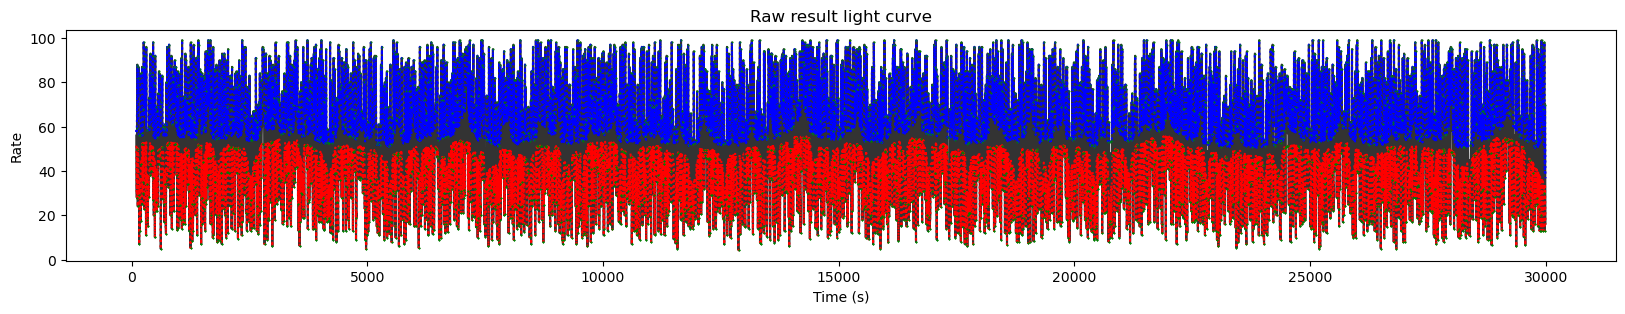

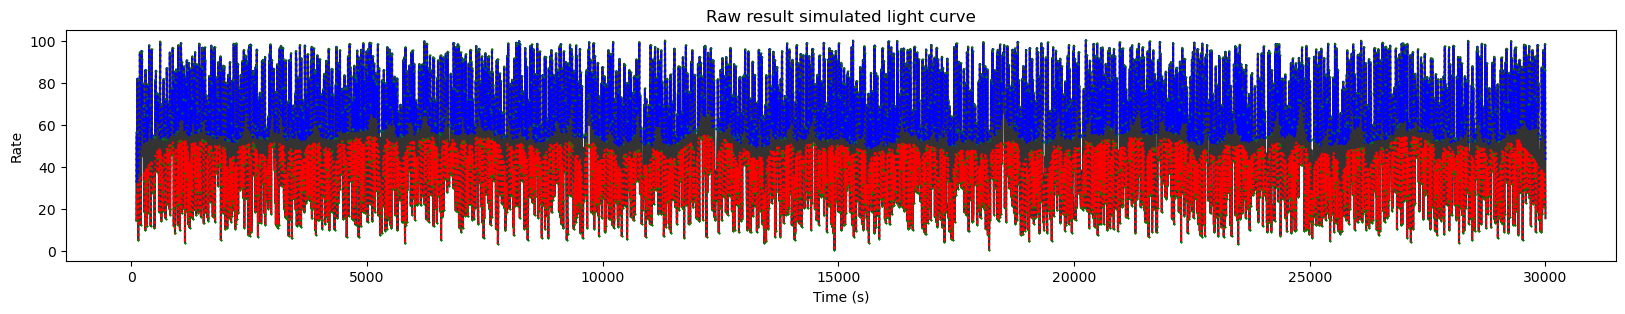

Train auto-encoders in syntetic data
DIPS


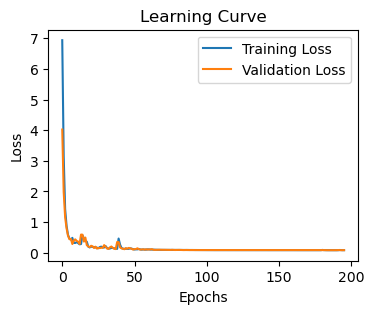

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 640x480 with 0 Axes>

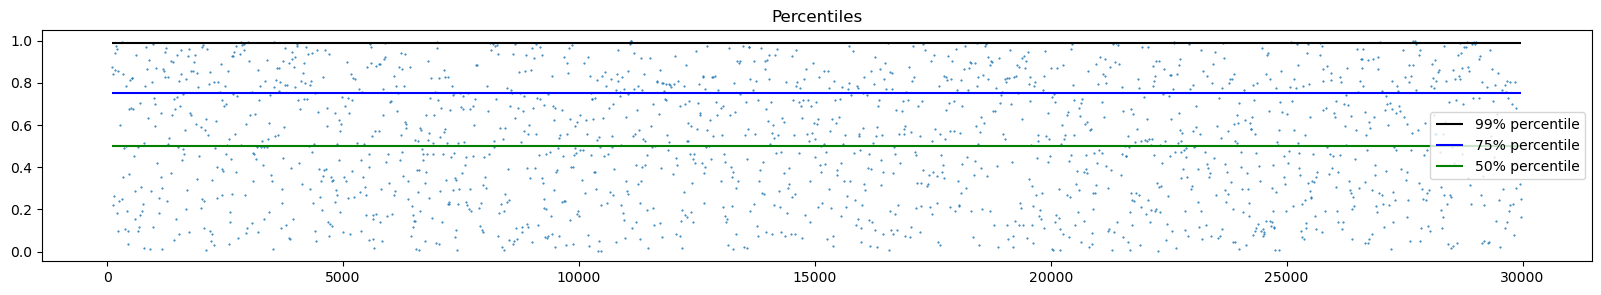

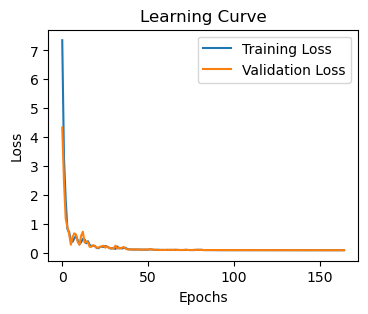

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
PEAKS


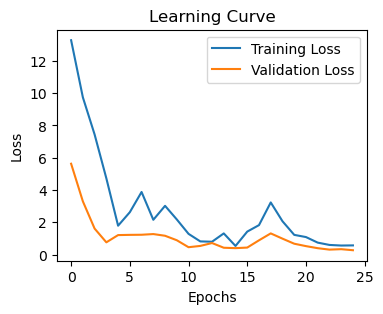

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step


<Figure size 640x480 with 0 Axes>

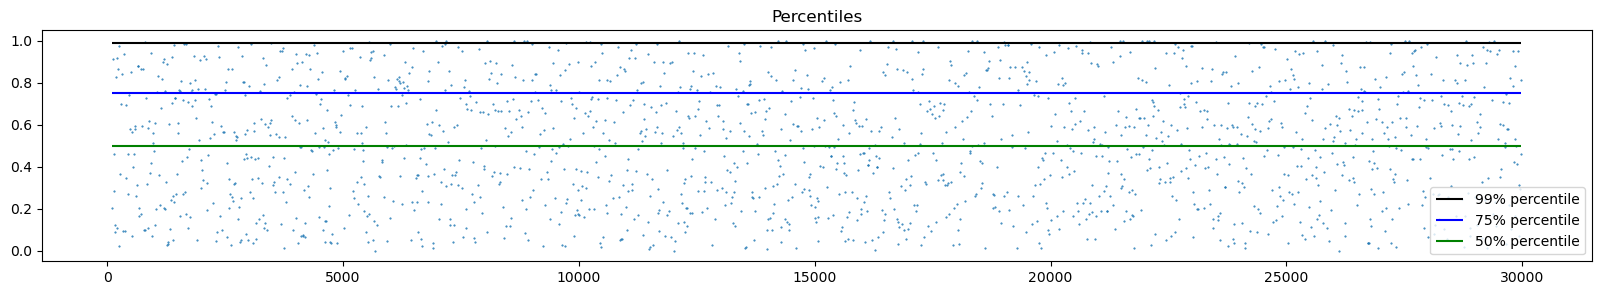

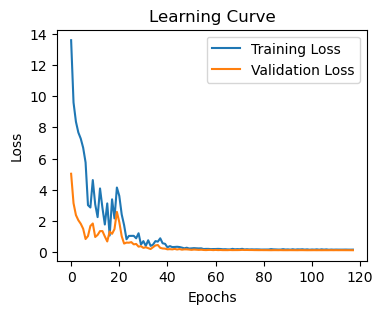

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step
Simulation:
Peaks per second: 0.0006 percentage of rejected peaks: 0.99
Dips per second: 0.0006 percentage of rejected dips: 0.9896
Result:
Peaks per second: 0.0013 percentage of rejected peaks: 0.9784 probability of detected peaks: 1.0
Dips per second: 0.0005 percentage of rejected dips: 0.9908 probability of detected dips: 0.0


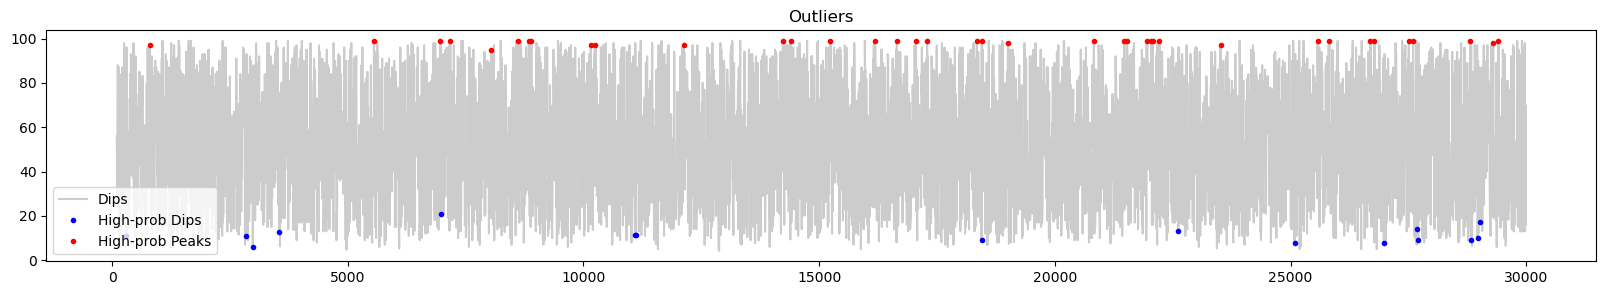

ValueError: too many values to unpack (expected 3)

In [3]:
lc="./test_lc"
tpeaks_to_clean, tdips_to_clean, tlcreb = detect_dips_and_peaks(lc, snr=0.5 ,index_time=0, index_rate=1, index_error_rate=2, num_simulations=1, show_plot = True)

In [ ]:
tpeaks_to_clean, tdips_to_clean, tlcreb = detect_dips_and_peaks(lc, snr=0.25 ,index_time=0, index_rate=1, index_error_rate=2, num_simulations=1, show_plot = True)

In [ ]:
tpeaks_to_clean, tdips_to_clean, tlcreb = detect_dips_and_peaks(lc, snr=0.1 ,index_time=0, index_rate=1, index_error_rate=2, num_simulations=1, show_plot = True)

In [ ]:
tpeaks_to_clean, tdips_to_clean, tlcreb = detect_dips_and_peaks(lc, snr=0.05 ,index_time=0, index_rate=1, index_error_rate=2, num_simulations=1, show_plot = True)

In [ ]:
tpeaks_to_clean, tdips_to_clean, tlcreb = detect_dips_and_peaks(lc, snr=0.01 ,index_time=0, index_rate=1, index_error_rate=2, num_simulations=1, show_plot = True)